In [1]:
# Build a tree with five steps and find the price of a three-month European call option with S_0=10, K=11, r=4% and σ=25%.
import numpy as np
import os # module provides a portable way of using operating system-dependent functionality eg. for walk

In [2]:
S0 = 10 # spot stock price
K = 11 # strike 
T = 0.25 #ttm
r = 0.04 #risk-free rate return
sigma = 0.25 # volatility
N = 5 # time intervals/steps
payoff = "call" # payoff S-E,0 for call; E-S,0 for put 

In [3]:
dT = float(T) / N # delta t
u = np.exp(sigma * np.sqrt(dT)) # up factor
d = 1.0 / u # down factor; used as v in class notes

In [4]:
S = np.zeros((N + 1, N + 1)) #create binomial tree
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1
S

array([[10.        , 10.57493726, 11.18292981, 11.82587812, 12.50579192,
        13.2247965 ],
       [ 0.        ,  9.45632087, 10.        , 10.57493726, 11.18292981,
        11.82587812],
       [ 0.        ,  0.        ,  8.94220045,  9.45632087, 10.        ,
        10.57493726],
       [ 0.        ,  0.        ,  0.        ,  8.45603168,  8.94220045,
         9.45632087],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  7.99629489,
         8.45603168],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         7.56155303]])

In [5]:
a = np.exp(r * dT)    # risk free compounded rate return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.5039253348587126

In [6]:
q

0.4960746651412874

In [7]:
p + q # should equal 1

1.0

In [8]:
S_T = S[:,-1] # option value at each final node
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0) # Max[(S_T-K),0] for a call option and Max[(K-S_T),0] for a put option, where K is the strike price and S_T is the spot price of the underlying asset at ttm
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        2.2247965 ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.82587812],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [9]:
for j in range(N-1, -1, -1): # for Eur option, find value at earlier nodes
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) # working back to the first node of the tree (the valuation date) where the calculated result is the value of the option
V

array([[0.20236186, 0.35036502, 0.59324718, 0.97397638, 1.52776994,
        2.2247965 ],
       [0.        , 0.05283313, 0.10505308, 0.20888688, 0.41534938,
        0.82587812],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ]])

In [10]:
print('European ' + payoff, str( V[0,0]))

European call 0.2023618622711507


In [11]:
# Based on Q1, if it is a European put, what is the value?
payoff = "put"

In [12]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42506274],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [13]:
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V # Eur option

array([[1.09291003, 0.68777882, 0.34451497, 0.10418614, 0.        ,
        0.        ],
       [0.        , 1.50886332, 1.03925068, 0.5900375 , 0.21044155,
        0.        ],
       [0.        , 0.        , 1.99199716, 1.49976701, 0.97802199,
        0.42506274],
       [0.        , 0.        , 0.        , 2.50005621, 2.03582154,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 2.9817271 ,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [14]:
print('European ' + payoff, str( V[0,0]))

European put 1.0929100335119963


In [15]:
# Based on Q1, if it is an American put, what is the value?
if payoff =="call":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(S[i,j] - K,np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
elif payoff =="put":
    for j in range(N-1, -1, -1):
        for i in range(j+1):
            V[i,j] = np.maximum(K - S[i,j],np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]))
V # for American option

array([[1.12395227, 0.70396044, 0.34990195, 0.10418614, 0.        ,
        0.        ],
       [0.        , 1.55512662, 1.06646308, 0.60091845, 0.21044155,
        0.        ],
       [0.        , 0.        , 2.05779955, 1.54367913, 1.        ,
        0.42506274],
       [0.        , 0.        , 0.        , 2.54396832, 2.05779955,
        1.54367913],
       [0.        , 0.        , 0.        , 0.        , 3.00370511,
        2.54396832],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        3.43844697]])

In [16]:
print('American ' + payoff, str( V[0,0]))

American put 1.1239522660139594


In [17]:
# Based on Q1, simulate 10000 times for the asset price with 90 steps in three months, plot the histogram for S_T.
def mcs_simulation_np(m,n):  # m is the number of steps and n is the number of simulation
    M = m
    I = n
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [18]:
S = mcs_simulation_np(90,10000)

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

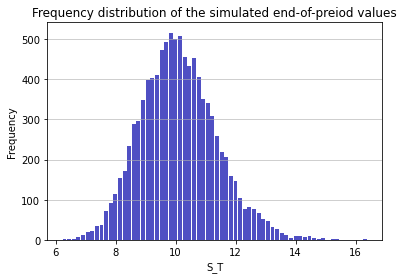

In [19]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[-1,:], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [20]:
# Based on Q4, Find the price for a European Call.
p = np.mean(np.maximum(S[-1,:] - K,0))
print('European call', str(p))

European call 0.18942349800743333


In [21]:
# Based on Q4, Find the price for a Binary Call.
cp = (S[-1,:]  - K)>0
bpc = np.mean(np.maximum(cp.astype(int),0))
print('Binary call', str(bpc))

Binary call 0.2268


In [22]:
pp = (K - S[-1,:])>0
bpp = np.mean(np.maximum(pp.astype(int),0))
print('Binary put', str(bpp))

Binary put 0.7732


In [23]:
bpc + bpp # should equal 1; binary put-call parity

1.0